# Lesson 3: Collaborative-based recommender systems: User-Based

Given an "active user" (Santi) and an item that has not been seen by the user, the goal is to estimate the rating for the item.
<table style="width:60%">
  <tr>
    <td></td>
    <td>Superman</td> 
    <td>Star Wars 1</td>
    <td>Matrix</td>
    <td>Spiderman</td>
    
  </tr>
  <tr>
    <td>Santi</td>
    <td>3</td> 
    <td>3.5</td>
    <td>4.5</td>
    <td><font color="red"><b>¿?</b></font></td>
  </tr>
  <tr>
    <td>User1</td>
    <td>3.5</td> 
    <td>4</td>
    <td>5</td>
    <td>5</td>
  </tr>
  <tr>
    <td>User2</td>
    <td>3</td> 
    <td><font color="red"><b>¿?</b></font></td>
    <td>4.5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>3.5</td> 
    <td>5</td>
    <td>3.5</td>
    <td>2</td>
  </tr>
</table>

<br><br><br><br>

<h3>How to measure similarity between users?</h3>
The computation of the similarity between the items is one critical step in the CF algorithms. The basic idea in similarity computation between two users <i>a</i> and <i>b</i> is to first isolate the items commonly rated by both users (set <i>P</i>), and then to apply a similarity computation technique to determine the similarity.
    <ul>
    <li>Euclidean distance</li>
    $$sim(a,b) = \sqrt{\sum_{p \in P}{(r_{a,p} - r_{b,p})^2}}$$
    <br>
    <li>Pearson Correlation</li>
    $$sim(a,b) = \frac{\sum_{p\in P} (r_{a,p}-\bar{r_a})(r_{b,p}-\bar{r_b})}{\sqrt{\sum_{p \in P}(r_{a,p}-\bar{r_a})²}\sqrt{\sum_{p \in P}(r_{b,p}-\bar{r_b})²}}$$
    <br>
    <li>Cosine distance</li>
    $$ sim(a,b) = \frac{\vec{a}· \vec{b}}{|\vec{a}| * |\vec{b}|}$$
    <br>
    </ul>
  
<br>
Where: 

* $sim(a,b)$ is the similarity between user "a" and user "b"
* $P$ is the set of common rated movies by user "a" and "b"
* $r_{a,p}$ is the rating of movie "p" by user "a"
* $\bar{r_a}$ is the mean rating given by user "a"

<br>

<h3>Some issues to take into accout</h3>
<ul>
<li>Pearson Correlation used to work better than euclidean distance since it is based more on the ranking than on the values.</li>
<li>Cosine distance is usually used when our data is binary/unary, i.e. like vs. not like  or buy vs. not buy.</li>
<li>What happens if two users have very few items in common?</li>
</ul>


<h3>How do we generate a prediction from the neighbour's ratings?</h3><br>

$$pred(a,p) = \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p})}}{\sum_{b \in N}{sim(a,b)}}$$

Example:
<br>
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1})$</td>
    <td>Rating Movie2: $r_{b,p_2}$</td>
    <td>$sim(a,b)*(r_{b,p_2})$</td>
    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>3</td>
    <td>2.97</td>
    <td>2.5</td>
    <td>2.48</td>
    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>3</td>
    <td>1.14</td>
    <td>3</td>
    <td>1.14</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>4.5</td>
    <td>4.0</td>
    <td> - </td>
    <td> - </td>
  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3</td>
    <td>2.77</td>
    <td>3</td>
    <td>2.77</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p})}$</td>
    <td></td> 
    <td></td>
    <td>10.87</td>
    <td></td>
    <td>6.39</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td>3.18</td>
    <td></td>
    <td>2.29</td>
  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td>3.41</td>
    <td></td>
    <td>2.79</td>
  </tr>
</table>


<br>
<h3><br><b>How improve this prediction function?</b></h3>
<h4> 1) Normalization: Predicitions scaled to the user domain.</h4><br>
Users rate differntly, some rate high, while other low. This is the prediction function that was used in the original in Netflix system. Using this function we are scaling the prediction to our mean.<br>

$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$
<br>


Example:<br>
Preciction for the user "a" with  $\bar{r_a} = 3.5$
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Mean Ratings: $\bar{r_b}$</td>
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1}-\bar{r_b})$</td>

    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>4.3</td> 
    <td>3</td>
    <td>-1.28</td>

    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>2.73</td> 
    <td>3</td>
    <td>0.10</td>

  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>3.12</td>  
    <td>4.5</td>
    <td>1.22</td>

  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3.98</td>  
    <td>3</td>
    <td>-0.90</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>-1.13</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.84</td>

  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.20</td>

  </tr>
</table>

<h4> 2) Not all neighbor rating might be equally.</h4><br>
Agreeement on commonly liked items is not as important as agreeement on controversial items. we can give a weigth correlated with the rating variance.

<h4> 3) Value of number of co-rated items</h4>
Reduce the similarity between users when the number of co-rated items is low or discard those users with a small number of co-rated items

<h4> 4) Case amplificiation </h4>
Increase the weigth to those users which are really really similars (~= 1)

<h4> 5) Neighborhood selection</h4>
Only a subset of similar user used to be used. Not-similar users used to be discarded

<h4> 6) Recursive Methods</h4>
In order to avoid cold-start we can apply a recursive method for new users.




<h3>Problems:</h3><br>
<ul>
<li>"Memory-based" approach</li>
<li>Need to be trained offline and updateted periodically</li>
</ul>

<h3>Evaluation: performance criterion</h3>
Performance evaluation of recommendation systems is an entire topic all in itself. Some of the options include:<br>
* $RMSE = \sqrt{(\frac{\sum(\hat{y}-y)^2}{n})}$
<br>
* Precision / Recall / F-scores
* ROC curves
* Cost curves

In [1]:
def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2)))

<h5>Download Movilens Database</h5>
There is three different version of the database containing 100k, 1m and 10m ratings. We can download the smallest version for this demo.
http://grouplens.org/datasets/movielens/



In [2]:
#NETFLIX REAL 50.000.000 usuaris and 100.000 items
%autosave 150
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

# Load Data set
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first three columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(3), encoding='latin-1')

# Construcció del DataFrame
data = pd.merge(pd.merge(ratings, users), movies)
data = data[['user_id','title', 'movie_id','rating','release_date','sex','age']]


print("La BD has "+ str(data.shape[0]) +" ratings")
print("La BD has ", data.user_id.nunique()," users")
print("La BD has ", data.movie_id.nunique(), " movies")
data.head()


Autosaving every 150 seconds
La BD has 100000 ratings
La BD has  943  users
La BD has  1682  movies


,user_id,title,movie_id,rating,release_date,sex,age
0,196,Kolya (1996),242,3,24-Jan-1997,M,49
1,305,Kolya (1996),242,5,24-Jan-1997,M,23
2,6,Kolya (1996),242,4,24-Jan-1997,M,42
3,234,Kolya (1996),242,4,24-Jan-1997,M,60
4,63,Kolya (1996),242,3,24-Jan-1997,M,31


##### Divide the data in two sets: training and test

In [3]:
def assign_to_set(df):
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.2)),
                                   replace=False)
    df.loc[sampled_ids, 'for_testing'] = True
    return df

data['for_testing'] = False
grouped = data.groupby('user_id', group_keys=False).apply(assign_to_set)
data_train = data[grouped.for_testing == False]
data_test = data[grouped.for_testing == True]
print(data_train.shape)
print(data_test.shape)
print(data_train.index & data_test.index)

print("Training data_set has "+ str(data_train.shape[0]) +" ratings")
print("Test data set has "+ str(data_test.shape[0]) +" ratings")
print("La BD has ", data.movie_id.nunique(), " movies")


(79619, 8)
(20381, 8)
Int64Index([], dtype='int64')
Training data_set has 79619 ratings
Test data set has 20381 ratings
La BD has  1682  movies


##### How to get the set of movies from user with id  "1"?

In [4]:
data_train[data_train.user_id==1].head(5)

,user_id,title,movie_id,rating,release_date,sex,age,for_testing
14,1,Kolya (1996),242,5,24-Jan-1997,M,24,False
417,1,Shall We Dance? (1996),251,4,11-Jul-1997,M,24,False
708,1,Ace Ventura: Pet Detective (1994),67,3,01-Jan-1994,M,24,False
940,1,Raising Arizona (1987),238,4,01-Jan-1987,M,24,False
1306,1,"Truth About Cats & Dogs, The (1996)",111,5,26-Apr-1996,M,24,False


##### Mean Rating of movies seen by user "1"

In [5]:
data_train[data_train.user_id==1].rating.mean()

3.5944700460829493

##### Mean rating of movie with title "Seven (Se7en) (1995)"

In [6]:
data_train.rating[data_train.title=="Seven (Se7en) (1995)"].mean()

3.877005347593583

##### Which are the 10 most rated movies?

In [7]:
data_train.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 451
Return of the Jedi (1983)        412
Contact (1997)                   401
Liar Liar (1997)                 396
Fargo (1996)                     393
Scream (1996)                    384
English Patient, The (1996)      382
Toy Story (1995)                 349
Air Force One (1997)             347
Independence Day (ID4) (1996)    336
dtype: int64

##### Which are the 10 movies with the highest score

In [8]:
data_train.groupby('title').rating.mean().sort_values(ascending=False).head(10)

title
Someone Else's America (1995)                        5.0
Aiqing wansui (1994)                                 5.0
Saint of Fort Washington, The (1993)                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Some Mother's Son (1996)                             5.0
Letter From Death Row, A (1998)                      5.0
Star Kid (1997)                                      5.0
Prefontaine (1997)                                   5.0
Great Day in Harlem, A (1994)                        5.0
Name: rating, dtype: float64

In [9]:
data_train.groupby('title').rating.mean().sort_values().tail(10)

title
Great Day in Harlem, A (1994)                        5.0
Prefontaine (1997)                                   5.0
Star Kid (1997)                                      5.0
Letter From Death Row, A (1998)                      5.0
Some Mother's Son (1996)                             5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Aiqing wansui (1994)                                 5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64

##### Top movies rated more than 10 times

In [10]:
size = data_train.groupby('title').size()
mean_score = data_train.groupby('title').rating.mean()
mean_score[size>10].sort_values(ascending=False).head()

title
Wrong Trousers, The (1993)          4.516854
Close Shave, A (1995)               4.500000
Casablanca (1942)                   4.443350
Schindler's List (1993)             4.440816
Shawshank Redemption, The (1994)    4.426667
Name: rating, dtype: float64

##### Which is the distibution of rated movies per user?

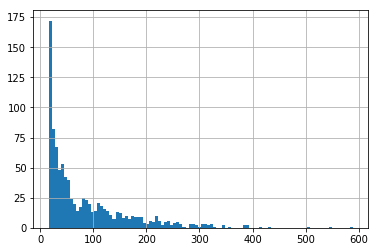

In [11]:
rated_movies = data_train.groupby('user_id').size().sort_values(ascending=False)
rated_movies.hist(bins=100)


In [12]:
def top_movies(dataFrame,usr):
    max_i = dataFrame[dataFrame.user_id == usr].rating.max() 
    print("Max puntuation of user", usr, "is:", max_i)
    return dataFrame[(dataFrame['user_id'] == usr) & (dataFrame['rating'] == max_i )].title

print(top_movies(data,2))

Max puntuation of user 2 is: 5
32                        Kolya (1996)
424             Shall We Dance? (1996)
4627             Secrets & Lies (1996)
6455          L.A. Confidential (1997)
11911                     Fargo (1996)
32768            Godfather, The (1972)
33462                 Star Wars (1977)
55954                   Titanic (1997)
58130    Wings of the Dove, The (1997)
63360     Sense and Sensibility (1995)
71232         Good Will Hunting (1997)
78981                      Emma (1996)
82001        As Good As It Gets (1997)
Name: title, dtype: object


##### <h5>Which is the similarity between user 1 and user 2?</h5> <h6>Let's look first for the common seen movies by the users </h6>

In [13]:
# dataframe with the data from user 1
data_user_1 = data_train[data_train.user_id==1]
# dataframe with the data from user 2
data_user_2 = data_train[data_train.user_id==2]
# We first compute the set of common movies
common_movies = set(data_user_1.movie_id).intersection(data_user_2.movie_id)
print("\nNumber of common movies",len(common_movies),'\n')

# creat the subdataframe with only with the common movies
mask = (data_user_1.movie_id.isin(common_movies))
data_user_1 = data_user_1[mask]
print(data_user_1[['title','rating']].head())

mask = (data_user_2.movie_id.isin(common_movies))
data_user_2 = data_user_2[mask]
print(data_user_2[['title','rating']].head())



Number of common movies 10 

                       title  rating
14              Kolya (1996)       5
417   Shall We Dance? (1996)       4
1618    Birdcage, The (1996)       4
3479     Men in Black (1997)       4
6080  Full Monty, The (1997)       5
                       title  rating
32              Kolya (1996)       5
424   Shall We Dance? (1996)       5
1648    Birdcage, The (1996)       4
3510     Men in Black (1997)       4
6129  Full Monty, The (1997)       4


In [14]:
r = pd.merge(data_user_1[['user_id','movie_id','rating']],data_user_2[['user_id','movie_id','rating']],on='movie_id')
r.rating_y,r.rating_x


(0    5
 1    5
 2    4
 3    4
 4    4
 5    4
 6    5
 7    4
 8    5
 9    3
 Name: rating_y, dtype: int64, 0    5
 1    4
 2    4
 3    4
 4    5
 5    2
 6    5
 7    5
 8    3
 9    5
 Name: rating_x, dtype: int64)

<h6>Let's define a function to compute the users similarity </h6>

In [15]:
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

# Returns a distance-based similarity score for person1 and person2
def SimEuclid(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id')    
    if len(rep)==0:
        return 0
    if(len(rep)<min_common_items):
        return 0
    #return distEuclid(rep['rating_x'],rep['rating_y']) 
    return 1.0/(1.0+euclidean(rep['rating_x'],rep['rating_y'])) 

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)==0:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    if(np.isnan(res)):
        return 0
    return res

print(SimPearson(data_train,1,2))
print(SimEuclid(data_train,1,2))

-0.0956365069595
0.205213096158


<h5>Let's build a Recommender System</h5>

In [16]:
class CollaborativeFiltering:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame, similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = pd.DataFrame(np.sum([0]),columns=data_train.user_id.unique(), index=data_train.user_id.unique())

    def learn(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allUsers=set(self.df['user_id'])
        self.sim = {}
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            a=data_train[data_train['user_id']==person1][['movie_id']]
            data_reduced=pd.merge(data_train,a,on='movie_id')
            for person2 in allUsers:
                # no es comparem am nosalres mateixos
                if person1==person2: continue
                self.sim.setdefault(person2, {})
                if(person1 in self.sim[person2]):continue # since is a simetric matrix
                sim=self.sim_method(data_reduced,person1,person2)
                if(sim<0):
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
                
    def estimate(self, user_id, movie_id):
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        allUsers=set(movie_users['user_id'])
        for other in allUsers:
            if user_id==other: continue 
            rating_num += self.sim[user_id][other] * float(movie_users[movie_users['user_id']==other]['rating'])
            rating_den += self.sim[user_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
        return rating_num/rating_den



### Let's create a small dataset in order to reduce the computation cost and speedup the calculus in the class

In [17]:
dataSmall = data[data['user_id']<100] # get only data from 100 users
print(dataSmall.shape)

dataSmall.loc[:,'for_testing'] = False
grouped = dataSmall.groupby('user_id', group_keys=False).apply(assign_to_set)
dataSmall_train = dataSmall[grouped.for_testing == False]
dataSmall_test = dataSmall[grouped.for_testing == True]

print(dataSmall_train.shape )
print(dataSmall_test.shape )

print('Usuaris:', dataSmall.user_id.nunique() )
print('Films:',dataSmall.movie_id.nunique() )

(10960, 8)
(8727, 8)
(2233, 8)
Usuaris: 99
Films: 1232


/Users/ssegui/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
reco = CollaborativeFiltering(dataSmall_train)
reco.learn()
reco.estimate(user_id=2,movie_id=1)

/Users/ssegui/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


3.9382140353647239

In [19]:
def evaluate(estimate_f,data_train,data_test):
    """ RMSE-based predictive performance evaluation with pandas. """
    ids_to_estimate = zip(data_test.user_id, data_test.movie_id)
    estimated = np.array([estimate_f(u,i) if u in data_train.user_id else 3 for (u,i) in ids_to_estimate ])
    real = data_test.rating.values
    return compute_rmse(estimated, real)

In [20]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco.estimate,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 1.24774697205


<div class  = "alert alert-success">**EXERCISE 1**<p>
Modify the Recomender System using as a prediction function the following equation:
$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$

</div>

<div class="alert alert-success">
**EXERCISE 2:**<br>
Modify the recomender system from the previous exercice, with one that in order to estimate the score of a movie B for the user A only uses the subset of the N most similar users to user A. Define N as a parameter of the Recoomender.
</div>

<div class  = "alert alert-success">**EXERCISE 3**<p>
Modify the similarity function with the following:
$$new\_sim(a,b) = sim(a,b) * \frac{min(50,|P_{ab}|)}{50} $$
where $|P_{ab}|$ is the number of common items with user $a$ and user $b$
</div>

<div class  = "alert alert-success">**EXERCISE 4**<p>
Is there a set of users where the systems work better than with othes users?
Does it depend on the number of rating per user?
</div>